In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.vision import *
from fastai import *
import time
import cv2 as cv

The next cell is there to get the annotations into python, the annotations for the pictures which are located in cars_train

In [0]:
#this  cell is there to get the annotation. They contain four number for frame, then the class then the image name. Our formal
#is a list of list. the little list contain the four coordinates for the box, then the category which is a number and then
#the image name. The images for which we get the annotations are in My Drive/fellowshipAI/cars_train
import scipy.io
cars_train_annotationsI=scipy.io.loadmat("drive/My Drive/fellowshipAI/devkit/cars_train_annos.mat")
cars_train_annotations=cars_train_annotationsI["annotations"]
grande_liste=[]
for j in range(len(cars_train_annotations[0])):
 petite_liste=[]
 for i in range(5):
  petite_liste.append(cars_train_annotations[0][j][i][0][0])
 petite_liste.append(cars_train_annotations[0][j][5][0])  
 grande_liste.append(petite_liste)
#Next we make a list of the image names called  picture_list
picture_list=[a[5] for a in grande_liste]
# Next we make a list of the images cathegories called cathegories_list
cathegories_list=[a[4] for a in grande_liste]
# Next we make a list of the images cathegories called boxes_list
boxes_list=[a[0:4] for a in grande_liste]

Next cell is there to put the working directory to My Drive/fellowshipAI/cars_train

In [0]:
#we change directory:
import os
os.chdir('drive/My Drive/fellowshipAI/cars_train')
!pwd

/content/drive/My Drive/fellowshipAI/cars_train


Next we do the cutting of the pictures

In [0]:
#This cells crops all images and writes them to the same adress. That is 
#this cell replaces the existing image by the cropped image. So for example you have 00001.jpg
#and after the process 00001.jpg is cropped
i=0
for image_adress in picture_list:
    O=cv.imread(image_adress)
    b=boxes_list[i]
    crop_O=O[b[1]:b[3],b[0]:b[2],:]
    crop_sized_O=cv.resize(src=crop_O,dsize=(229,229))
    cv.imwrite(image_adress,crop_sized_O)
    i=i+1 



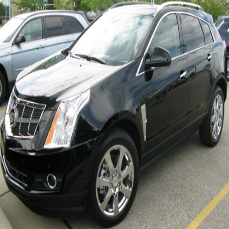

In [0]:
open_image("08122.jpg")

Next we are going to do create a data bunch and apply  resnet34 with our cars_train and

In [0]:
data=ImageDataBunch.from_lists(".",fnames=picture_list,labels=cathegories_list,valid_pct=0.2,size=229,bs=20)

data.normalize(imagenet_stats)
learn=cnn_learner(data,models.resnet34,metrics=accuracy)

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.329300,1.127997,0.718059,00:40
1,0.559791,1.299211,0.675061,00:39
2,0.779604,1.364955,0.670147,00:41
3,0.605342,1.290398,0.669533,00:40
4,0.504737,1.224388,0.687346,00:40
5,0.357966,1.136037,0.711302,00:39
6,0.258893,1.091313,0.708845,00:40
7,0.256762,1.116175,0.713145,00:39


In [0]:
learn.load("stage2")

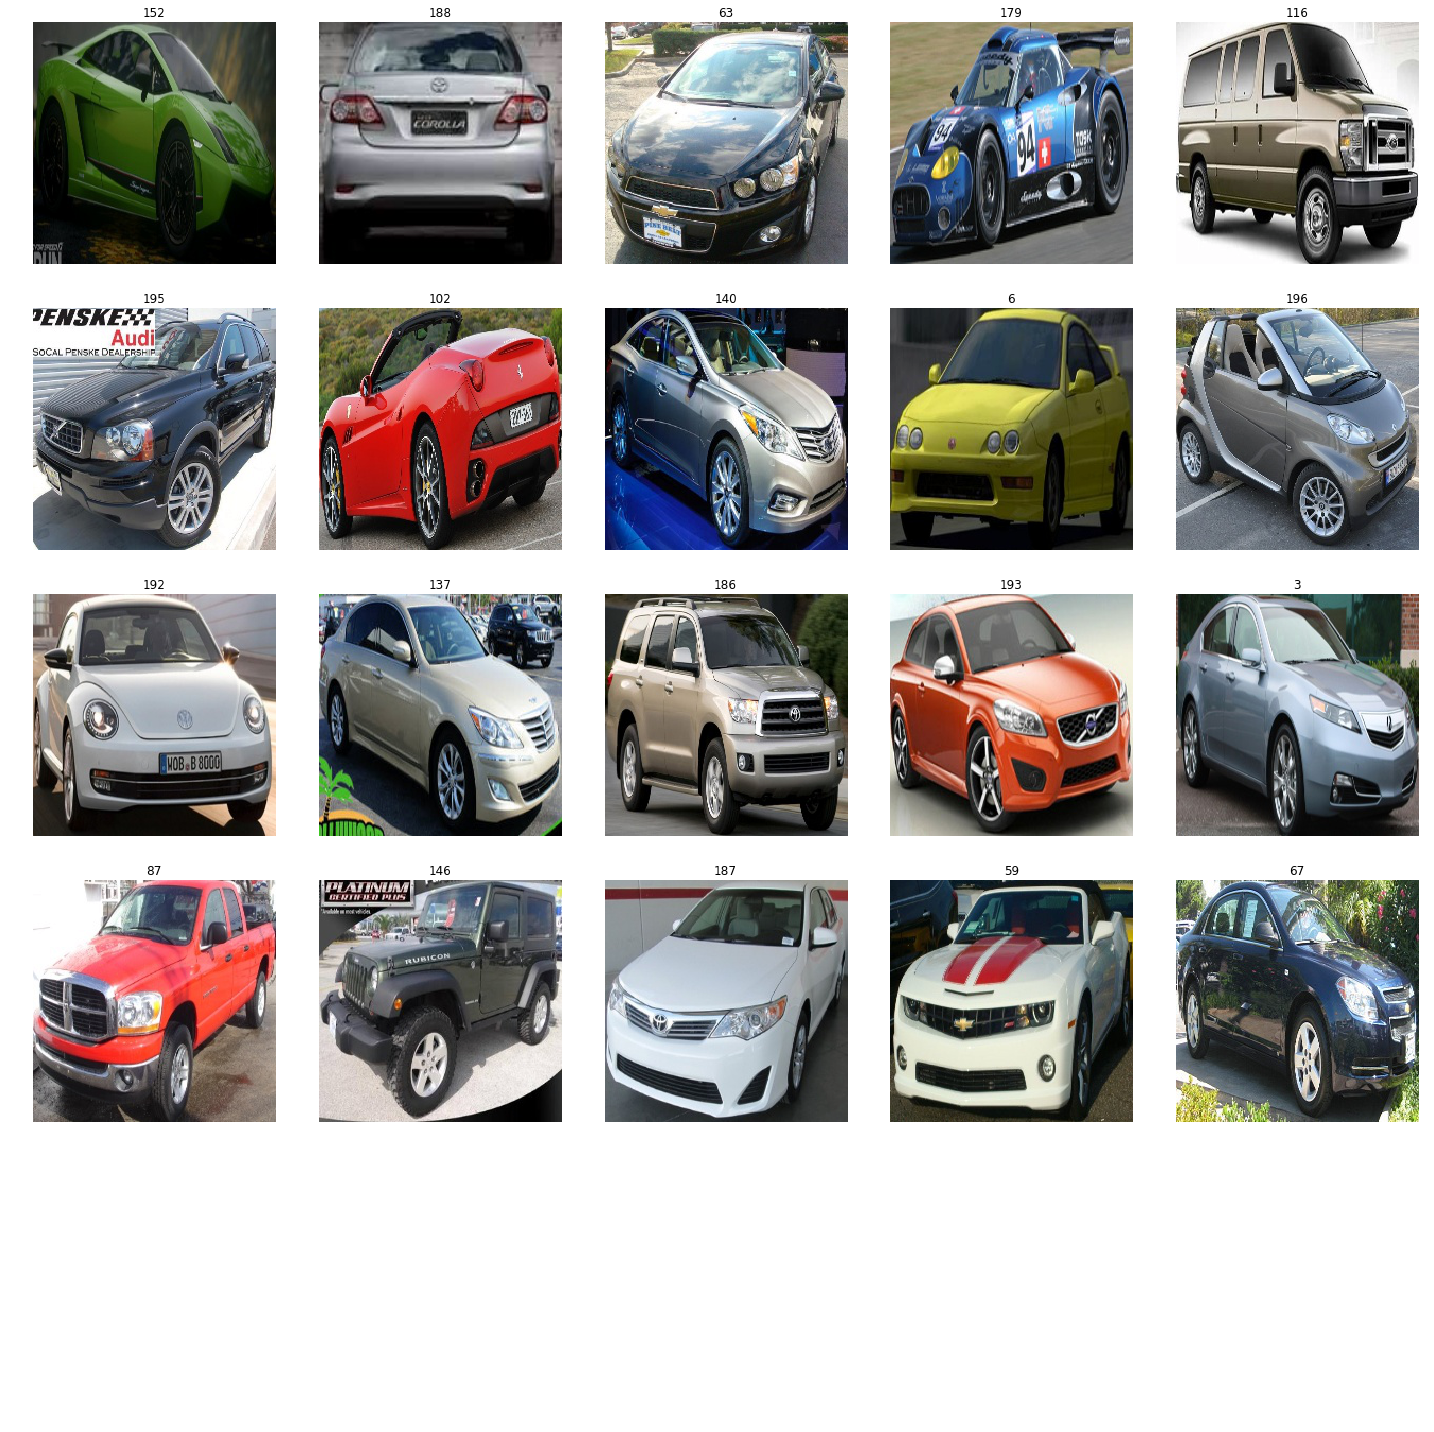

In [0]:
data.show_batch()


In [0]:
open_image("00001.jpg")


In [0]:
import cv2 as cv

Some cars have no background, that is white background. There seems to be an easy way to indentify them when we look at the historgram of pixels: it is less spread out.
These cars without background could be useful to find masks for example.
In the histograms below thosed which have the values concentrated are the cars
with white background

torch.Size([182, 276])
torch.Size([360, 640])
torch.Size([741, 1024])
torch.Size([480, 640])
torch.Size([373, 600])
torch.Size([360, 460])
torch.Size([1944, 2592])
torch.Size([800, 1280])
torch.Size([183, 275])


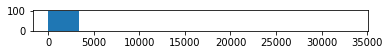

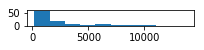

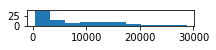

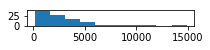

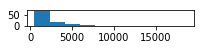

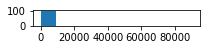

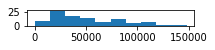

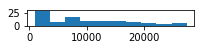

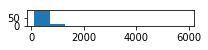

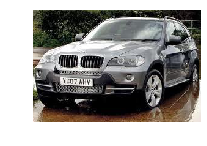

In [0]:
for i in range(1,10):
 a= "cars_test/0000"+str(i)+".jpg"
 im=open_image(a)
 print(im.data[0,:,:].shape)
 plt.subplot(9,1,i)
 plt.hist(torch.histc(im.data[1,:,:]))
 im.show()
plt.show()
  

In [0]:
for i in range(1,10):
 a= "cars_test/0000"+str(i)+".jpg"
 im=open_image(a)
 print(im.data.shape)


torch.Size([3, 182, 276])
torch.Size([3, 360, 640])
torch.Size([3, 741, 1024])
torch.Size([3, 480, 640])
torch.Size([3, 373, 600])
torch.Size([3, 360, 460])
torch.Size([3, 1944, 2592])
torch.Size([3, 800, 1280])
torch.Size([3, 183, 275])


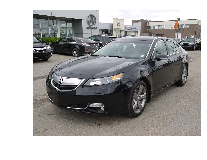

In [0]:
im=open_image("cars_train/00002.jpg")
im.show()




In [0]:
import matplotlib.pyplot as plt